In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Potato\Train',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Potato\Test',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Potato\Valid',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [3]:
class_names = training_dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

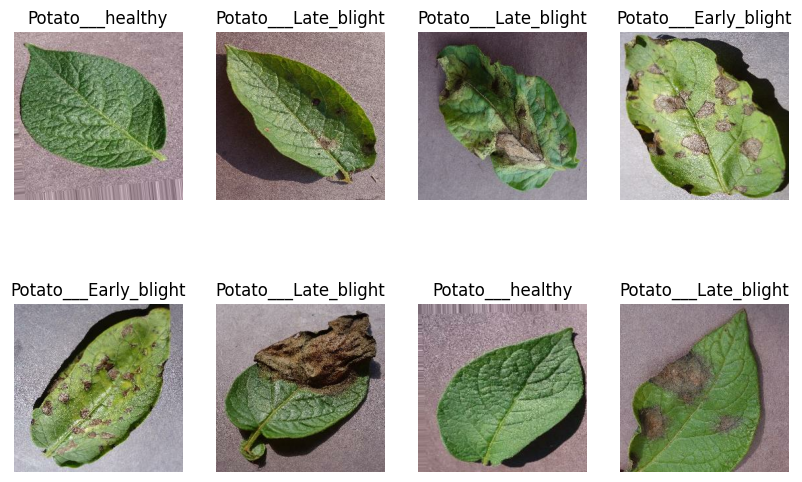

In [4]:
len(training_dataset)
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [5]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [6]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [7]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [8]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [9]:
model.summary()
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [10]:
model.fit(
    training_dataset,
    epochs=50, 
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)
model.evaluate(test_data)

Epoch 1/50
29/29 [==============================] - 36s 1s/step - loss: 1.0936 - accuracy: 0.3611 - val_loss: 1.0675 - val_accuracy: 0.5100
Epoch 2/50
29/29 [==============================] - 32s 1s/step - loss: 1.0998 - accuracy: 0.3544 - val_loss: 1.0959 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 32s 1s/step - loss: 1.0981 - accuracy: 0.3356 - val_loss: 1.0886 - val_accuracy: 0.7700
Epoch 4/50
29/29 [==============================] - 32s 1s/step - loss: 0.9830 - accuracy: 0.5611 - val_loss: 0.6897 - val_accuracy: 0.7300
Epoch 5/50
29/29 [==============================] - 32s 1s/step - loss: 0.7129 - accuracy: 0.6678 - val_loss: 0.7338 - val_accuracy: 0.6800
Epoch 6/50
29/29 [==============================] - 32s 1s/step - loss: 0.6624 - accuracy: 0.6911 - val_loss: 1.1779 - val_accuracy: 0.5133
Epoch 7/50
29/29 [==============================] - 32s 1s/step - loss: 0.5368 - accuracy: 0.7633 - val_loss: 0.6185 - val_accuracy: 0.7367
Epoch 8/50
29/29 [==

[0.17623984813690186, 0.9399999976158142]

The Image Title :  Potato___Early_blight
1/1 [==============================] - 0s 492ms/step
Model Predicted label :  Potato___Early_blight


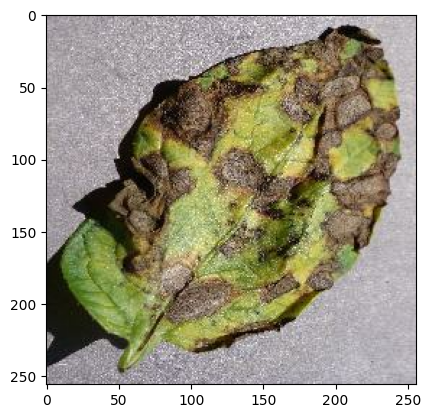

In [11]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])
     

In [13]:
model.save("Potato-Disease_Classification.h5")
from tensorflow.keras.models import load_model

# load model 
model = load_model('Potato-Disease_Classification.h5')

# check model info 
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [20]:
tf.__version__

'2.12.0'